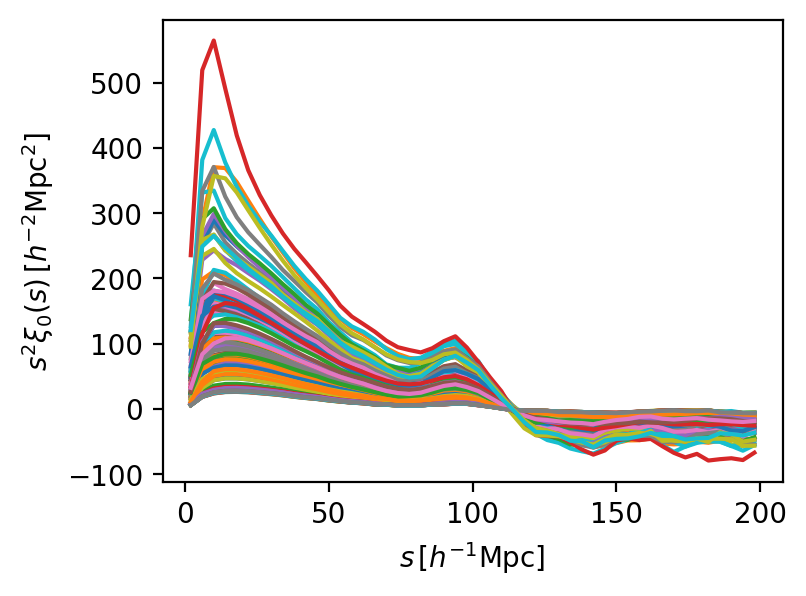

In [10]:
from astropy.stats import sigma_clip
from pycorr import TwoPointCorrelationFunction
import numpy as np
from pathlib import Path
import glob
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'


n_hod = 100
ells = (0,)
# cosmos = list(range(0, 5)) + list(range(13, 14)) + list(range(100, 127)) + list(range(130, 182))
cosmos = list(range(2, 3))


fig, ax = plt.subplots(figsize=(4, 3))

multipoles_hod = []

for cosmo in cosmos:
    multipoles_hod = []
    for hod in range(n_hod):
        data_dir = f'/pscratch/sd/e/epaillas/emc/training_sets/tpcf/cosmo+hod_bugfix/z0.5/yuan23_prior/c{cosmo:03}_ph000/seed0/'
        data_fn = Path(data_dir) / f'tpcf_hod{hod:03}.npy'
        result = TwoPointCorrelationFunction.load(data_fn)[::4]
        s, multipoles = result(ells=ells, return_sep=True)
        multipoles_hod.append(np.concatenate(multipoles))
        # multipoles_all.append(multipoles[ell//2])
        ax.plot(s, s**2*multipoles_hod[hod])
        
    
ax.set_xlabel(r'$s\,[h^{-1}{\rm Mpc}]$')
ax.set_ylabel(r'$s^2\xi_0(s)\,[h^{-2}{\rm Mpc^2}]$')
plt.show()

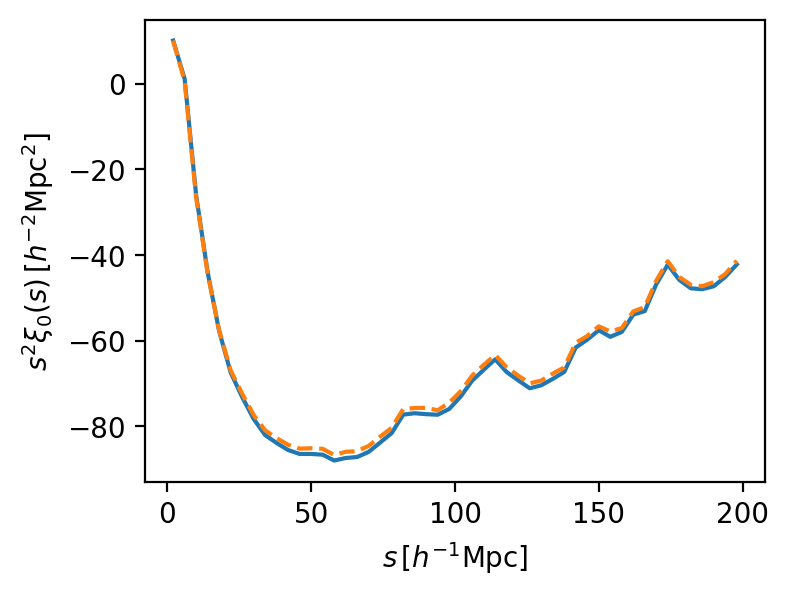

In [14]:
from astropy.stats import sigma_clip
from pycorr import TwoPointCorrelationFunction
import numpy as np
from pathlib import Path
import glob
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'


cosmo_idx = 102
hod_idx = 4
ell = 2

fig, ax = plt.subplots(figsize=(4, 3))


data_dir = f'/pscratch/sd/e/epaillas/emc/training_sets/tpcf/cosmo+hod/z0.5/yuan23_prior/c{cosmo_idx:03}_ph000/seed0/'
data_fn = Path(data_dir) / f'tpcf_hod{hod_idx:03}.npy'
result = TwoPointCorrelationFunction.load(data_fn)[::4]
s, multipoles = result(ells=(0, 2), return_sep=True)
ax.plot(s, s**2*multipoles[ell//2])

data_dir = f'/pscratch/sd/e/epaillas/emc/training_sets/tpcf/cosmo+hod_bugfix/z0.5/yuan23_prior/c{cosmo_idx:03}_ph000/seed0/'
data_fn = Path(data_dir) / f'tpcf_hod{hod_idx:03}.npy'
result = TwoPointCorrelationFunction.load(data_fn)[::4]
s, multipoles = result(ells=(0, 2), return_sep=True)
ax.plot(s, s**2*multipoles[ell//2], ls='--')
        
    
ax.set_xlabel(r'$s\,[h^{-1}{\rm Mpc}]$')
ax.set_ylabel(r'$s^2\xi_0(s)\,[h^{-2}{\rm Mpc^2}]$')
plt.show()

In [113]:
from pathlib import Path
import matplotlib.pyplot as plt
from pycorr import TwoPointCorrelationFunction
import numpy as np
import fitsio
from astropy.stats import sigma_clip
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

hods = list(range(10000))

multipoles_hod = []
nden_hod = []
chi2_hod = []
for hod in hods:
    data_dir = f'/pscratch/sd/e/epaillas/emc/training_sets/tpcf/z0.5/yuan23_prior/c000_ph000/seed0/'
    data_fn = Path(data_dir) / f'tpcf_hod{hod:03}.npy'
    data = TwoPointCorrelationFunction.load(data_fn)[::4]
    # data.select((0, 30))
    s, multipoles = data(ells=(0, 2), return_sep=True)
    
    data_dir = '/pscratch/sd/e/epaillas/emc/hods/z0.5/yuan23_prior/c000_ph000/seed0/'
    data_fn = Path(data_dir) / f'hod{hod:03}.fits'
    data = fitsio.read(data_fn)
    nden = len(data['X'])/2000**3
    
    multipoles = np.concatenate(multipoles)
    multipoles_hod.append(multipoles)
    nden_hod.append(nden)
    
    res = np.concatenate(multipoles_diffsky) - multipoles
    chi2 = np.dot(np.dot(res, np.linalg.inv(cov)), res)
    chi2_hod.append(chi2)

    # ax.plot(s, s**2*multipoles[0])
    # ax.plot(multipoles)
    
# ax.set_yscale('log')
# plt.show()

nden_hod = np.asarray(nden_hod)
multipoles_hod = np.asarray(multipoles_hod)

# find the abacus multipoles that minimize the chi2 with respect to diffsky
# res = (np.concatenate(multipoles_diffsky) - multipoles_hod).T
# chi2 = np.dot(np.dot(res, np.linalg.inv(cov)), res)
# chi2 = np.sum((multipoles_diffsky - multipoles_hod)**2, axis=1) + (nden_hod - 5e-4)**2
min_idx = np.argmin(chi2_hod)
# min_idx = 466
print(min_idx)
print(nden_hod[min_idx])

6486
0.000499601125


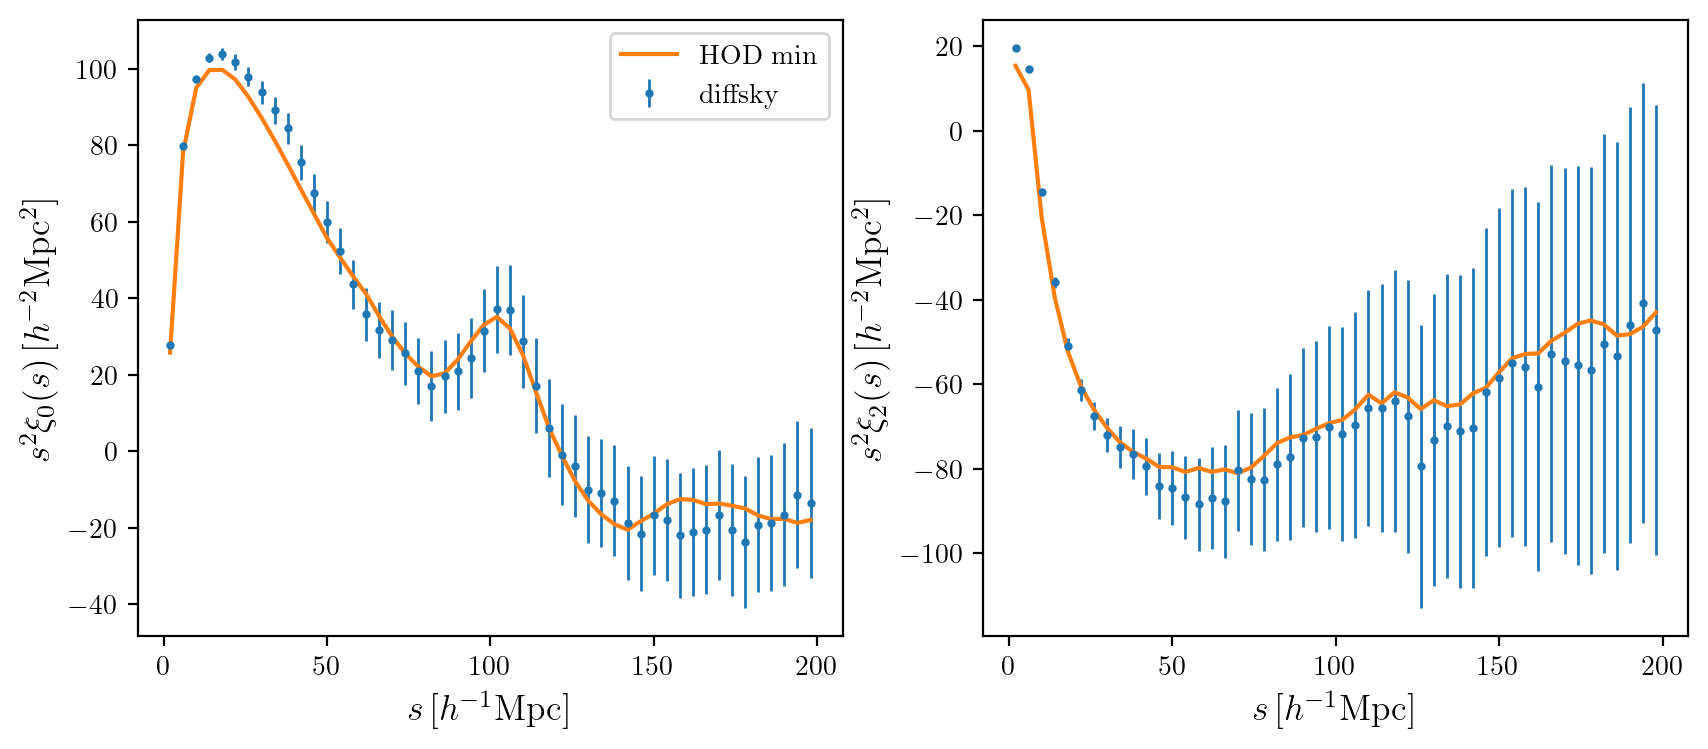

In [112]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].errorbar(s, s**2*multipoles_diffsky[0], s**2 * error_xi0, label='diffsky', marker='o', ls='', ms=2.0, elinewidth=1.0)
ax[0].plot(s, s**2*multipoles_hod[min_idx][:len(s)], label='HOD min')
# ax[0].plot(s, s**2*mean[:len(s)], label='cov. mean')

ax[1].errorbar(s, s**2*multipoles_diffsky[1], s**2 * error_xi2, label='diffsky', marker='o', ls='', ms=2.0, elinewidth=1.0)
ax[1].plot(s, s**2*multipoles_hod[min_idx][len(s):], label='HOD min')
# ax[1].plot(s, s**2*mean[len(s):], label='cov. mean')

ax[0].set_xlabel(r'$s\,[h^{-1}{\rm Mpc}]$', fontsize=13)
ax[1].set_xlabel(r'$s\,[h^{-1}{\rm Mpc}]$', fontsize=13)
ax[0].set_ylabel(r'$s^2\xi_0(s)\,[h^{-2}{\rm Mpc^2}]$', fontsize=13)
ax[1].set_ylabel(r'$s^2\xi_2(s)\,[h^{-2}{\rm Mpc^2}]$', fontsize=13)
ax[0].legend()
plt.show()

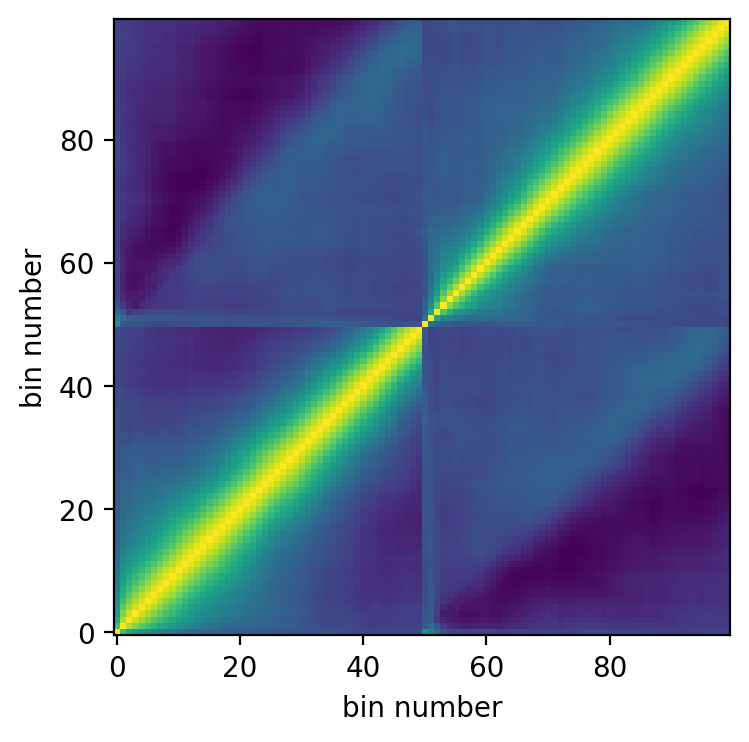

Loaded LHC with shape: (8500, 20), (8500, 100)


In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
from pycorr import TwoPointCorrelationFunction
import numpy as np
import pandas as pd
from astropy.stats import sigma_clip
%matplotlib inline
%config InlineBackend.figure_format='retina'

def read_covariance():
    data_dir = f'/pscratch/sd/e/epaillas/emc/training_sets/tpcf/cosmo+hod/z0.5/yuan23_prior/ph000/seed0/'
    data_fn = Path(data_dir) / f'tpcf_lhc.npy'
    y = np.load(data_fn, allow_pickle=True).item()['cov_y']
    prefactor = 1 / 8
    cov = prefactor * np.cov(y, rowvar=False)
    corr = np.corrcoef(y, rowvar=False)
    return cov, corr

def read_lhc():
    data_dir = f'/pscratch/sd/e/epaillas/emc/training_sets/tpcf/cosmo+hod/z0.5/yuan23_prior/ph000/seed0/'
    data_fn = Path(data_dir) / f'tpcf_lhc.npy'
    data = np.load(data_fn, allow_pickle=True).item()
    lhc_x = data['lhc_x']
    lhc_x_names = data['lhc_x_names']
    lhc_y = data['lhc_y']
    return lhc_x, lhc_y, lhc_x_names

covariance_matrix, correlation_matrix = read_covariance()

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(correlation_matrix, origin='lower')
ax.set_xlabel('bin number')
ax.set_ylabel('bin number')
plt.show()

lhc_x, lhc_y, lhc_x_names = read_lhc()
print(f'Loaded LHC with shape: {lhc_x.shape}, {lhc_y.shape}')

# mask outliers
# mask = sigma_clip(lhc_y, sigma=6, axis=0, masked=True).mask
# mask = np.all(~mask, axis=1)
# lhc_x = lhc_x[mask]
# lhc_y = lhc_y[mask]
# print(f'After sigma clipping: {lhc_x.shape}, {lhc_y.shape}')

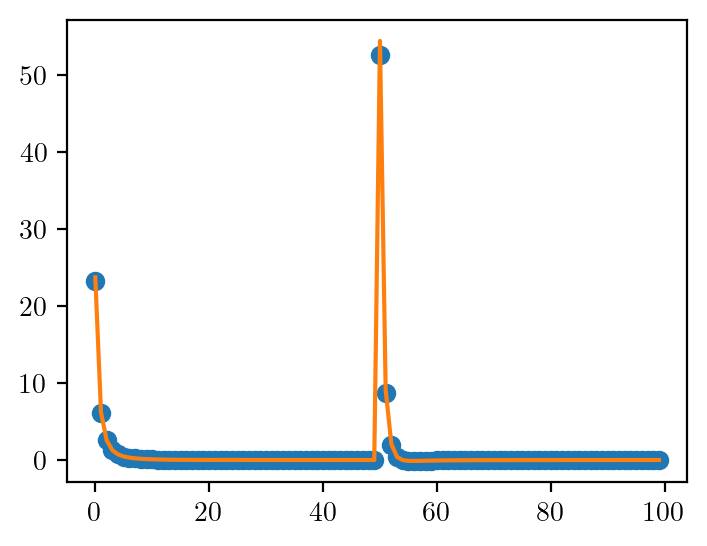

/tmp/ipykernel_1821296/2483718241.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('coolwarm')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


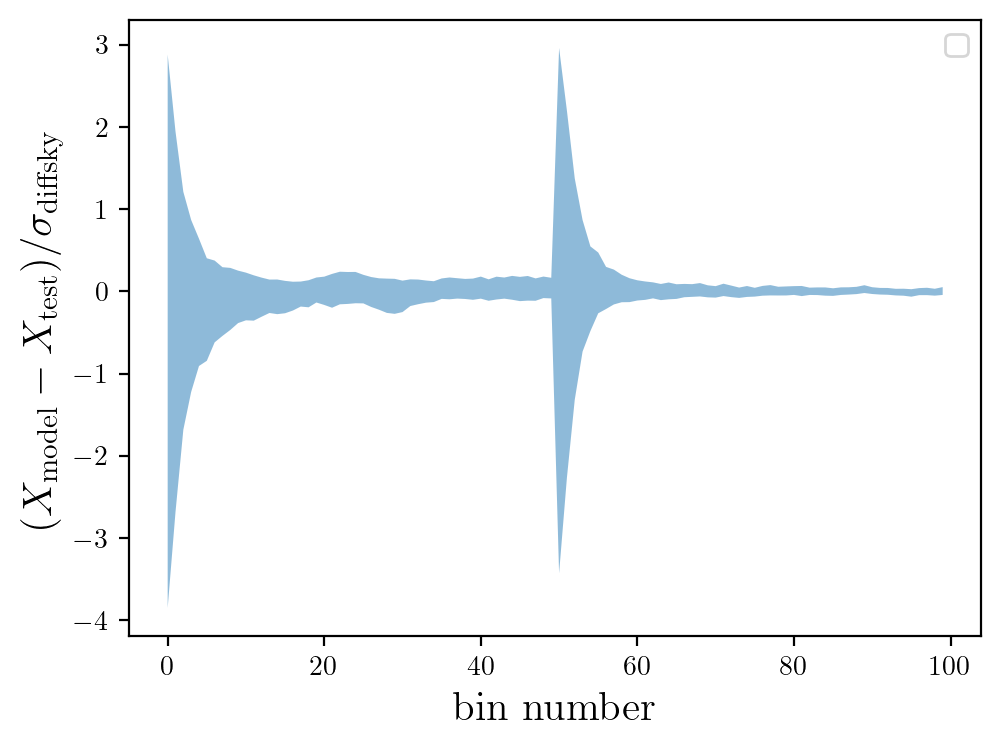

In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
from astropy.stats import sigma_clip
from pycorr import TwoPointCorrelationFunction
from sunbird.emulators import FCN
import torch
import pandas
import matplotlib
import matplotlib.pyplot as plt
import glob
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


# mask outliers
# mask = sigma_clip(lhc_y, sigma=6, axis=0, masked=True).mask
# mask = np.all(~mask, axis=1)
# lhc_x = lhc_x[mask]
# lhc_y = lhc_y[mask]
# print(f'After sigma clipping: {lhc_x.shape}, {lhc_y.shape}')


ntot = len(lhc_y)
nstep = int(ntot / 5)
q68_all = []
q95_all = []
emuerr_all = []
emulator_error_all = []

    # start_idx = i * nstep
    # end_idx = (i + 1) * nstep
    # idx_train = list(range(0, start_idx)) + list(range(end_idx, ntot))
    # idx_test = list(range(start_idx, end_idx))

idx_train = list(range(600, ntot))
idx_test = list(range(600))

lhc_train_x = lhc_x[idx_train]
lhc_train_y = lhc_y[idx_train]
lhc_test_x = lhc_x[idx_test]
lhc_test_y = lhc_y[idx_test]

# checkpoint_fn = glob.glob(f'/pscratch/sd/e/epaillas/emc/trained_models/tpcf/may20b_leaveout_{i}/*.ckpt')[0]
checkpoint_fn = f'/pscratch/sd/e/epaillas/emc/trained_models/tpcf/cosmo+hod/jul9/last.ckpt'
model = FCN.load_from_checkpoint(checkpoint_fn, strict=True)
model.eval()

with torch.no_grad():
    pred_test_y = model.get_prediction(torch.Tensor(lhc_test_x))
    pred_test_y = pred_test_y.numpy()

# pred_test_y = 10 ** pred_test_y + np.min(lhc_y) - 1.e-6

emulator_error = (pred_test_y - lhc_test_y)/np.sqrt(np.diag(covariance_matrix))
# emulator_error = (pred_test_y - lhc_test_y)/lhc_test_y
q68 = np.quantile(emulator_error, [0.16, 0.84], axis=0)
q95 = np.quantile(emulator_error, [0.025, 0.975], axis=0)
q99 = np.quantile(emulator_error, [0.005, 0.995], axis=0)

q68_all.append(q68)
q95_all.append(q95)
emulator_error_all.append((pred_test_y - lhc_test_y)/np.sqrt(np.diag(covariance_matrix)))
# emulator_error_all.append((pred_test_y - lhc_test_y)/lhc_test_y)
emuerr_all.append(pred_test_y - lhc_test_y)

fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(lhc_test_y[0], marker='o', ls='')
ax.plot(pred_test_y[0])
plt.show()
    
# plt.show()
    
# q68_all = np.array(q68_all).mean(axis=0)
# q95_all = np.array(q95_all).mean(axis=0)
emulator_error_all = np.concatenate(emulator_error_all)
q68_all = np.quantile(emulator_error_all, [0.16, 0.84], axis=0)
emu_cov = np.cov(emulator_error_all, rowvar=False)
                      
fig, ax = plt.subplots(figsize=(5.5, 4))
cmap = matplotlib.cm.get_cmap('coolwarm')

# for i in range(len(emulator_error_all)):
#     ax.plot(list(range(emulator_error.shape[1])), emulator_error_all[i], color='grey', lw=0.2)
# ax.fill_between(list(range(emulator_error.shape[1])), q95_all[0], q95_all[1], alpha=0.5, label='95\%', color='C1')

ax.fill_between(list(range(emulator_error.shape[1])), q68_all[0], q68_all[1],
                alpha=0.5)
    # ax.fill_between(list(range(emulator_error.shape[1])), q68_all[0], q68_all[1], alpha=0.5, label='68\%', color='C0')
ax.legend()
ax.set_xlabel('bin number', fontsize=15)
ax.set_ylabel('(model - test)/sigma', fontsize=15)
ax.set_ylabel(r'$(X_{\rm model} - X_{\rm test})/\sigma_{\rm diffsky}$', fontsize=15)
# plt.ylim(-0.1,0.1)
# ax.fill_between(list(range(len(s)), q68_all[0], q68_all[1], alpha=0.5, color='crimson'))
plt.show()

# save_dir = '/pscratch/sd/e/epaillas/emc/training_sets/tpcf/z0.5/yuan23_prior/c000_ph000/seed0'
# save_fn = Path(save_dir) / 'tpcf_emulator_error.npy'
# np.save(save_fn, np.sqrt(np.diag(covariance_matrix)) * (np.abs(q68[0]) + np.abs(q68[1]))/2)

# fig, ax = plt.subplots()
# # ax.fill_between(list(range(emulator_error.shape[1])), q95_all[0], q95_all[1], alpha=0.5, label='95\%', color='C1')
# ax.plot(list(range(emulator_error.shape[1])), np.sqrt(np.diag(emu_cov)), alpha=0.5, label='68\%', color='C0')
# ax.legend()
# ax.set_xlabel('bin number', fontsize=15)

# # ax.set_ylabel('(model - test)/sigma', fontsize=15)
# ax.set_ylabel(r'$(X_{\rm model} - X_{\rm test})/\sigma_{\rm test}$', fontsize=15)
# # plt.ylim(-3,3)

['omega_b', 'omega_cdm', 'sigma8_m', 'n_s', 'nrun', 'N_ur', 'w0_fld', 'wa_fld', 'logM_cut', 'logM_1', 'sigma', 'alpha', 'kappa', 'alpha_c', 'alpha_s', 's', 'A_cen', 'A_sat', 'B_cen', 'B_sat']
Loaded LHC with shape: (8500, 20), (8500, 100)
Removed no burn in


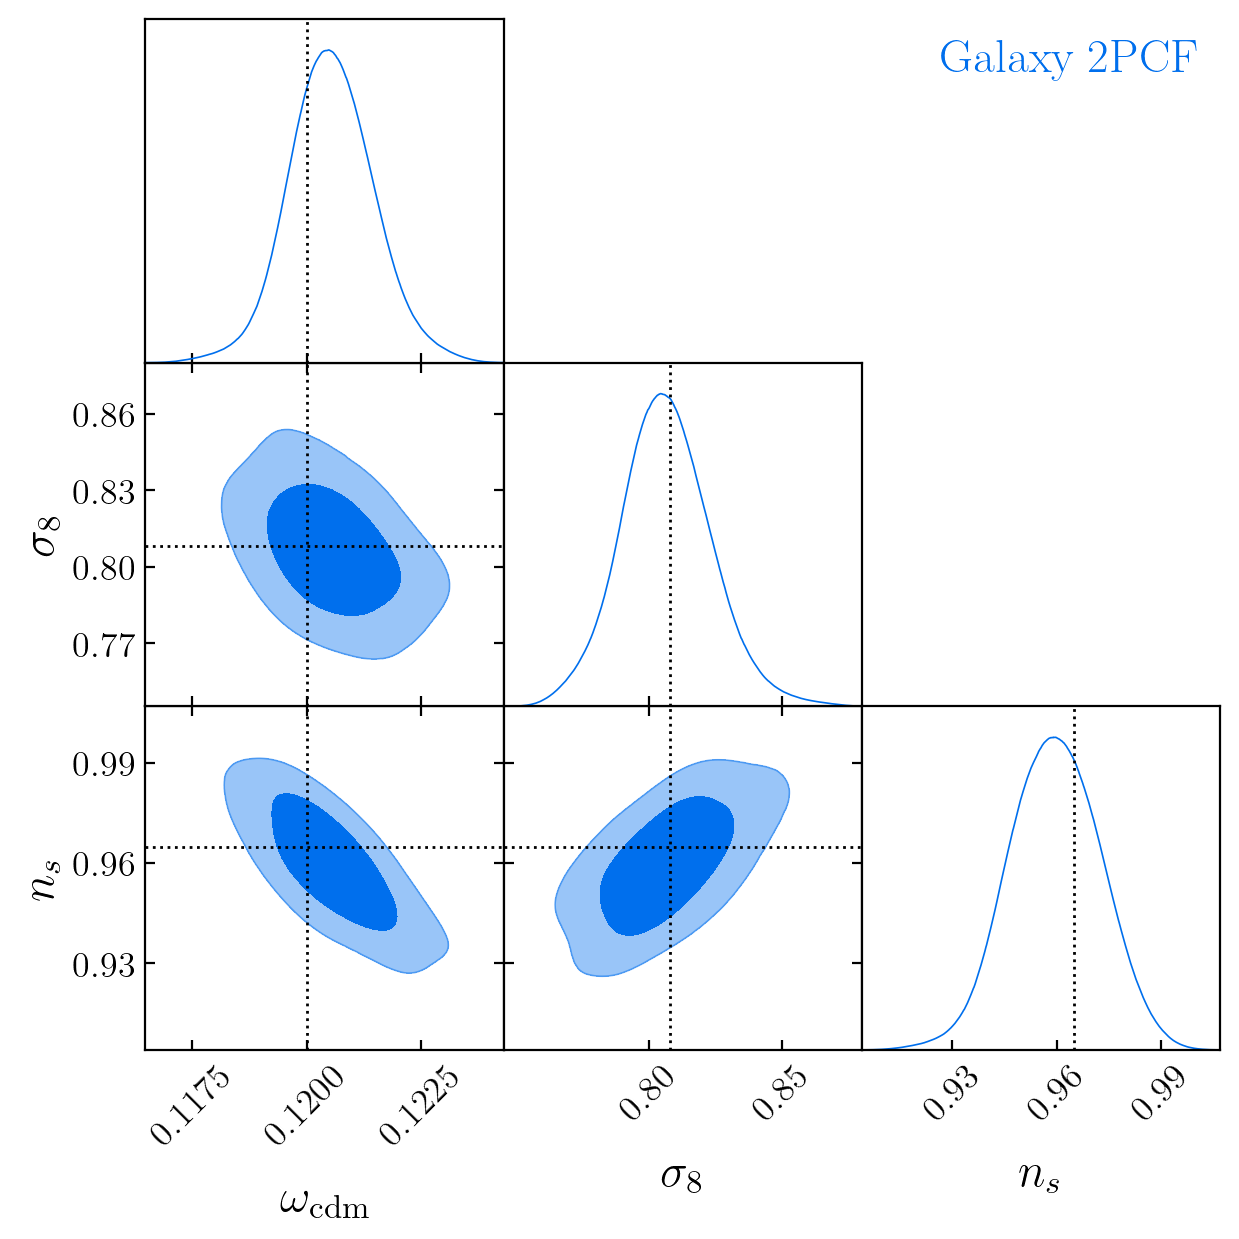

In [10]:
from getdist import plots, MCSamples
%matplotlib inline

labels = {
    "omega_b": r"\omega_{\rm b}",
    "omega_cdm": r"\omega_{\rm cdm}",
    "sigma8_m": r"\sigma_8",
    "n_s": r"n_s",
    "nrun": r"\alpha_s",
    "N_ur": r"N_{\rm ur}",
    "w0_fld": r"w_0",
    "wa_fld": r"w_a",
    "logM_1": "logM_1",
    "logM_cut": r"logM_{\rm cut}",
    "alpha": r"\alpha",
    "alpha_s": r"\alpha_{\rm vel, s}",
    "alpha_c": r"\alpha_{\rm vel, c}",
    "sigma": r"\log \sigma",
    "kappa": r"\kappa",
    "B_cen": r"B_{\rm cen}",
    "B_sat": r"B_{\rm sat}",
    "fsigma8": r"f \sigma_8",
    "Omega_m": r"\Omega_{\rm m}",
    "H0": r"H_0",
}

def read_lhc():
    data_dir = f'/pscratch/sd/e/epaillas/emc/training_sets/tpcf/cosmo+hod/z0.5/yuan23_prior/ph000/seed0/'
    data_fn = Path(data_dir) / f'tpcf_lhc.npy'
    data = np.load(data_fn, allow_pickle=True).item()
    return data['lhc_x'], data['lhc_y'], data['lhc_x_names']



# stats = ['wst', 'dsc_conf', 'dsc_fourier', 'minkowski']
stats = ['tpcf']

idx_fit = 1

chains = []

for statistic in stats:

    # load the data
    lhc_x, lhc_y, lhc_x_names = read_lhc()
    print(lhc_x_names)
    print(f'Loaded LHC with shape: {lhc_x.shape}, {lhc_y.shape}')
    
    data_fn = f'/global/homes/e/epaillas/code/acm/projects/emc/test_cosmo+hod_idx{idx_fit}.npy'
    data = np.load(data_fn, allow_pickle=True).item()

    chains.append(
        MCSamples(
                samples=data['samples'],
                weights=data['weights'],
                names=data['names'],
                ranges=data['ranges'],
                labels=[labels[n] for n in data['names']],
            )
    )
    
    
g = plots.get_subplot_plotter()
g.settings.constrained_layout = True
g.settings.axis_marker_lw = 1.0
g.settings.axis_marker_ls = ":"
g.settings.title_limit_labels = False
g.settings.axis_marker_color = "k"
g.settings.legend_colored_text = True
g.settings.figure_legend_frame = False
g.settings.linewidth_contour = 1.0
g.settings.legend_fontsize = 20
g.settings.axes_fontsize = 16
g.settings.axes_labelsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_max_labels = 6

g.triangle_plot(
    roots=chains,
    legend_labels=['Galaxy 2PCF'],
    filled=True,
    markers=dict(zip(lhc_x_names, lhc_x[idx_fit])),
    params=['omega_cdm', 'sigma8_m', 'n_s'],
    # legend_labels=stats
)
# plt.savefig(f'fig/posterior_test_emuerr_all_hod{idx_fit}.pdf', bbox_inches='tight')
plt.savefig(f'fig/posterior_tpcf_hod{idx_fit}.pdf', bbox_inches='tight')

Loaded LHC with shape: (8500, 20), (8500, 100)
Removed no burn in
Loaded LHC with shape: (8500, 20), (8500, 100)
Removed no burn in
Loaded LHC with shape: (8500, 20), (8500, 100)
Removed no burn in
Loaded LHC with shape: (8500, 20), (8500, 100)
Removed no burn in
Loaded LHC with shape: (8500, 20), (8500, 100)
Removed no burn in
Loaded LHC with shape: (8500, 20), (8500, 100)
Removed no burn in
Loaded LHC with shape: (8500, 20), (8500, 100)
Removed no burn in
Loaded LHC with shape: (8500, 20), (8500, 100)
Removed no burn in
Loaded LHC with shape: (8500, 20), (8500, 100)
Removed no burn in


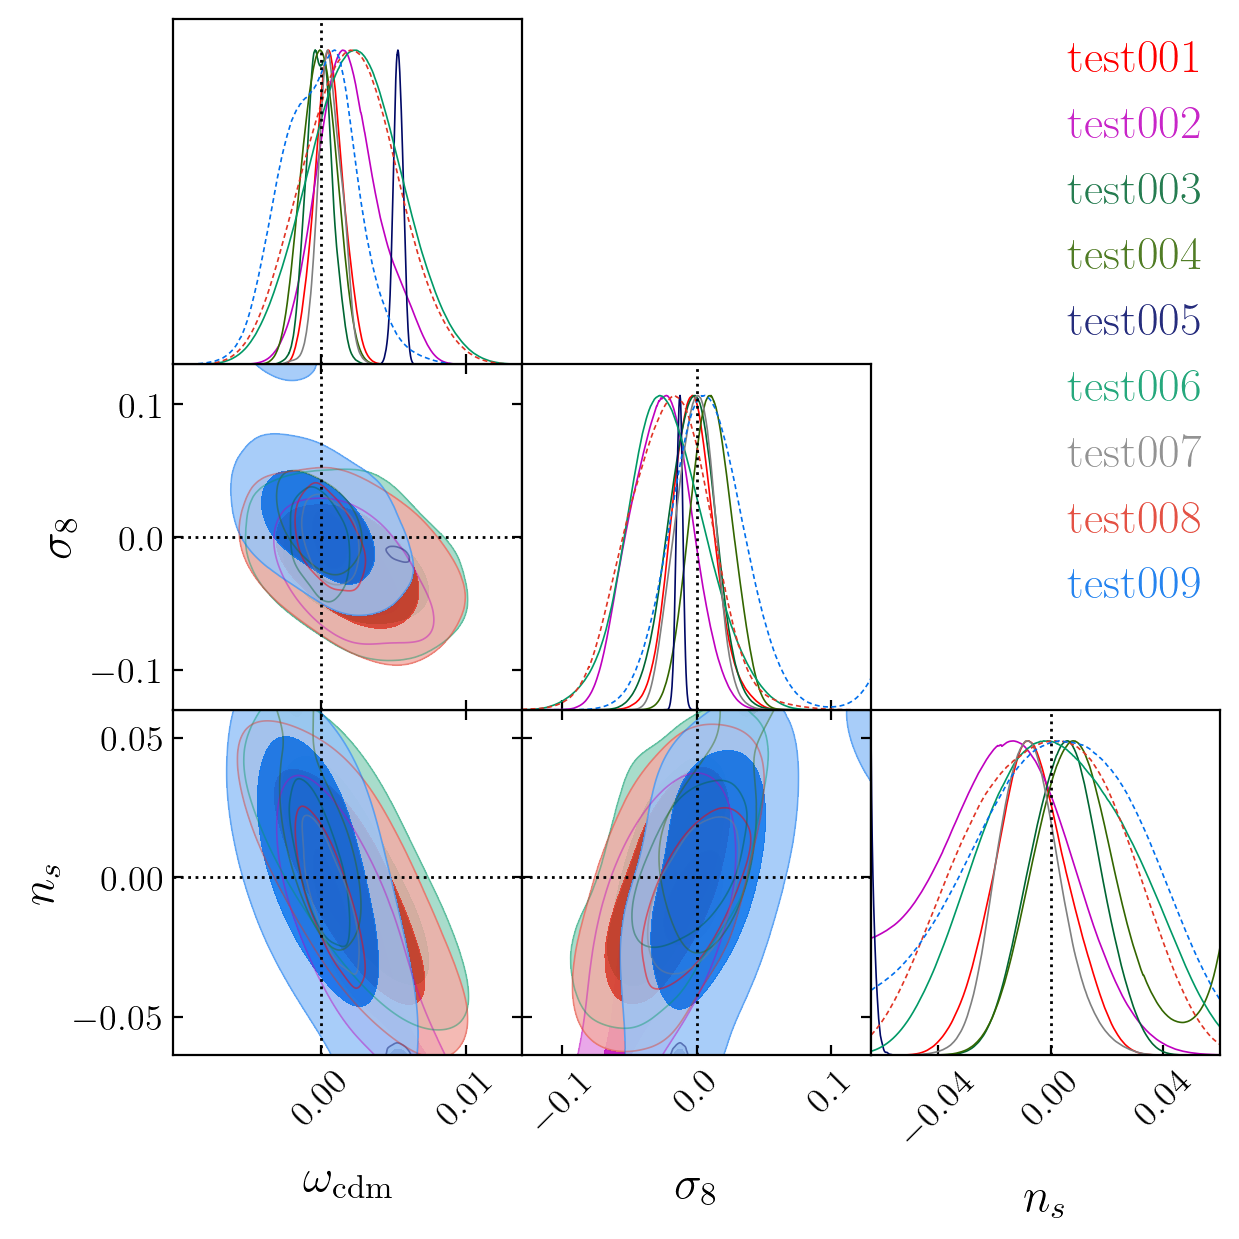

In [32]:
from getdist import plots, MCSamples
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

labels = {
    "omega_b": r"\omega_{\rm b}",
    "omega_cdm": r"\omega_{\rm cdm}",
    "sigma8_m": r"\sigma_8",
    "n_s": r"n_s",
    "nrun": r"\alpha_s",
    "N_ur": r"N_{\rm ur}",
    "w0_fld": r"w_0",
    "wa_fld": r"w_a",
    "logM_1": r"\log M_1",
    "logM_cut": r"\log M_{\rm cut}",
    "alpha": r"\alpha",
    "alpha_s": r"\alpha_{\rm vel, s}",
    "alpha_c": r"\alpha_{\rm vel, c}",
    "sigma": r"\log \sigma",
    "kappa": r"\kappa",
    "B_cen": r"B_{\rm cen}",
    "B_sat": r"B_{\rm sat}",
    "fsigma8": r"f \sigma_8",
    "Omega_m": r"\Omega_{\rm m}",
    "H0": r"H_0",
}



# stats = ['wst', 'dsc_conf', 'dsc_fourier', 'minkowski']
stats = ['wp_tpcf']
idxs_fit = list(range(1, 10))
legend_labels = [f'test{idx:03}' for idx in idxs_fit]

chains = []

for idx_fit in idxs_fit:

    truth = dict(zip(lhc_x_names, lhc_x[idx_fit]))


    for statistic in stats:

        # load the data
        lhc_x, lhc_y, lhc_x_names = read_lhc()
        print(f'Loaded LHC with shape: {lhc_x.shape}, {lhc_y.shape}')

        data_fn = f'/global/homes/e/epaillas/code/acm/projects/emc/posterior_cosmo+hod_{statistic}_idx{idx_fit}.npy'
        data = np.load(data_fn, allow_pickle=True).item()

        for key, value in data['ranges'].items():
            data['ranges'][key] = value - truth[key]

        chains.append(
            MCSamples(
                    samples=data['samples'] - [truth[name] for name in data['names']],
                    weights=data['weights'],
                    names=data['names'],
                    ranges=data['ranges'],
                    labels=[labels[n] for n in data['names']],
                )
        )
    
    
g = plots.get_subplot_plotter()
g.settings.constrained_layout = True
g.settings.axis_marker_lw = 1.0
g.settings.axis_marker_ls = ":"
g.settings.title_limit_labels = False
g.settings.axis_marker_color = "k"
g.settings.legend_colored_text = True
g.settings.figure_legend_frame = False
g.settings.linewidth_contour = 1.0
g.settings.legend_fontsize = 20
g.settings.axes_fontsize = 16
g.settings.axes_labelsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_max_labels = 6

g.triangle_plot(
    roots=chains,
    legend_labels=legend_labels,
    filled=True,
    # markers=dict(zip(lhc_x_names, lhc_x[idx_fit])),
    markers=dict(zip(lhc_x_names, np.zeros(len(lhc_x_names)))),
    params=['omega_cdm', 'sigma8_m', 'n_s'],
    # params=['logM_cut', 'logM_1', 'alpha_s', 'sigma']
    # legend_labels=stats
)
# plt.savefig(f'fig/posterior_test_emuerr_all_hod{idx_fit}.pdf', bbox_inches='tight')
# plt.savefig(f'fig/posterior_tpcf_hod{idx_fit}.pdf', bbox_inches='tight')

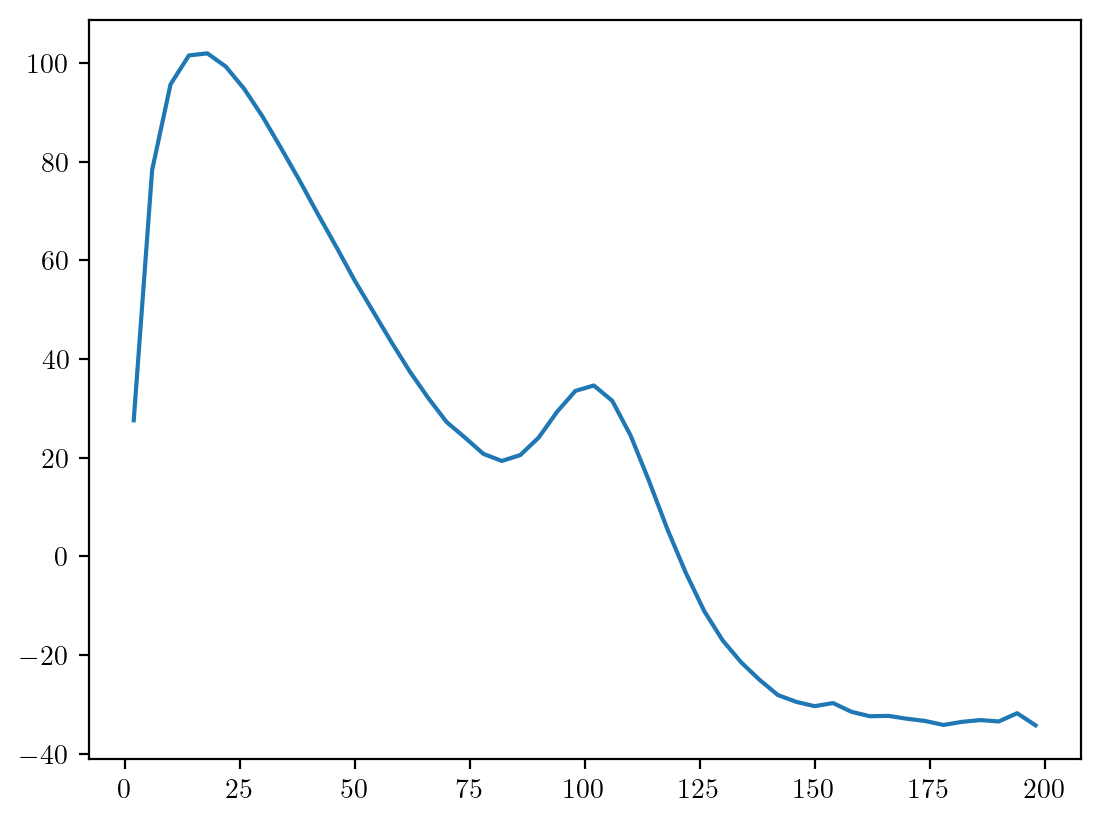

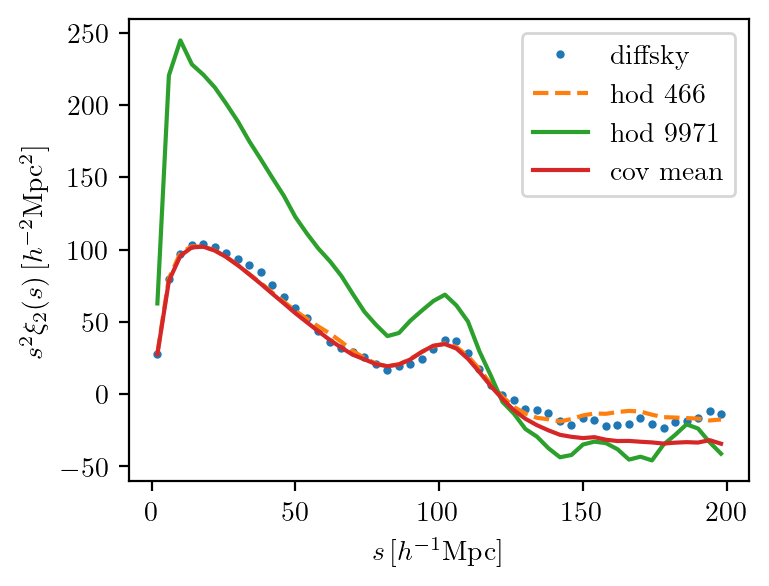

In [57]:
def read_covariance(ells=(0, 2)):
    data_dir = Path('/pscratch/sd/e/epaillas/emc')
    covariance_path = data_dir / 'covariance/tpcf/z0.5/yuan23_prior/'
    n_for_covariance = 1_000
    covariance_files = list(covariance_path.glob('tpcf_ph*.npy'))[:n_for_covariance]
    covariance_y = [
        TwoPointCorrelationFunction.load(file)[::4](ells=ells,).reshape(-1) for file in covariance_files
    ]
    prefactor = 1./8.
    mean = np.mean(covariance_y, axis=0)
    cov = prefactor * np.cov(np.array(covariance_y).T)
    return mean, cov


mean, cov = read_covariance(ells=(0,))

fig, ax = plt.subplots()
ax.plot(s, s**2 * mean)
plt.show()


fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(s, s**2*multipoles_diffsky, label='diffsky', marker='o', ls='', ms=2.0)
ax.plot(s, s**2*multipoles_hod[466], label='hod 466', ls='--')
ax.plot(s, s**2*multipoles_hod[9971], label='hod 9971')
ax.plot(s, s**2*mean, label='cov mean')
ax.set_xlabel(r'$s\,[h^{-1}{\rm Mpc}]$')
ax.set_ylabel(r'$s^2\xi_2(s)\,[h^{-2}{\rm Mpc^2}]$')
ax.legend()
plt.show()

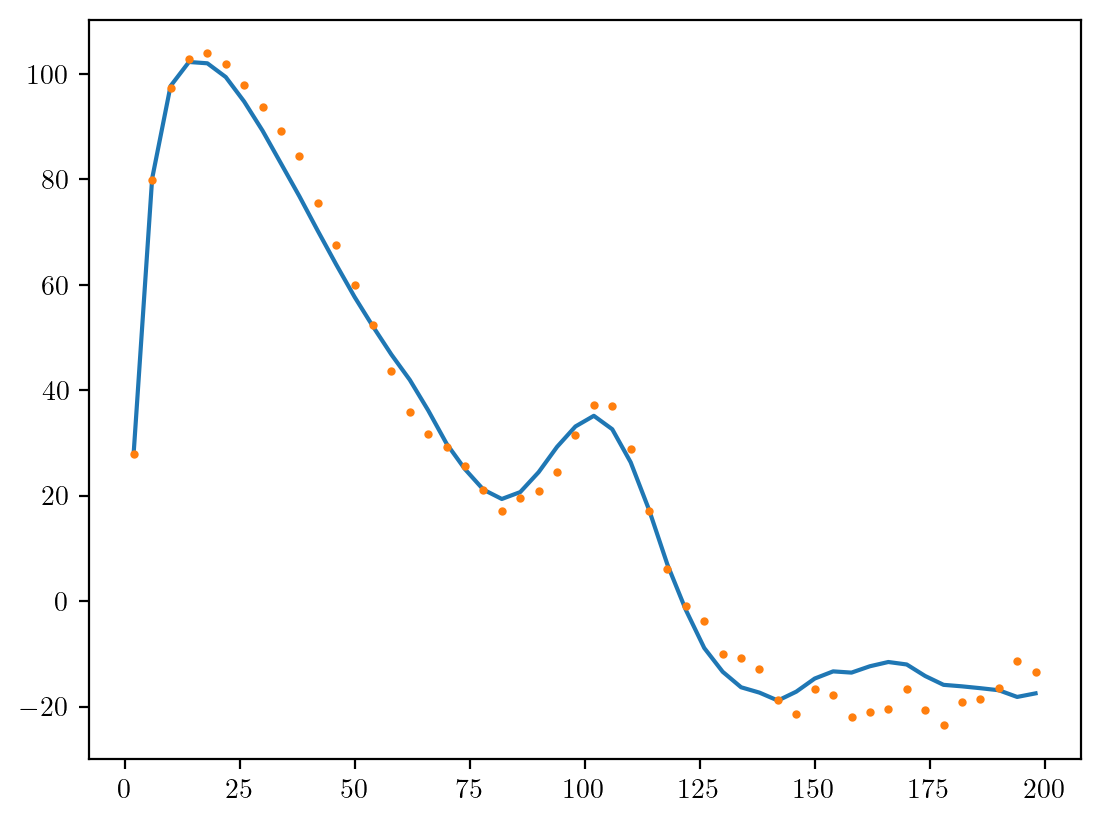

In [65]:
fig, ax = plt.subplots()

data_dir = f'/pscratch/sd/e/epaillas/emc/training_sets/tpcf/z0.5/yuan23_prior/c000_ph000/seed0/'
data_fn = Path(data_dir) / f'tpcf_hod466.npy'
data = TwoPointCorrelationFunction.load(data_fn)[::4]
s, multipoles = data(ells=ells, return_sep=True)

ax.plot(s, s**2 * multipoles[0])
ax.plot(s, s**2*multipoles_diffsky, label='diffsky', marker='o', ls='', ms=2.0)

plt.show()